In [222]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [223]:
#reading the data
loan_data = pd.read_csv("..\loan.csv")

In [224]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [225]:
loan_data.shape

(39717, 111)

In [226]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## There are Many columns which have only Null Values and they wouldn't contribute to analysis in any way, so lets remove them ##

In [227]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

## It is observed that a Number of columns are single valued ##
* They wouldn't contribute in analysis, so removing them as well

In [228]:
loan_data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [229]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis = 1, inplace = True)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_prncp total_rec_int  \
0   10.65%       162.87     B        B2  ...         5000.00        863.16   
1   15.27%        59.83     C        C4  ...          456.46        435.17   
2   15.96%        84.33     C        C5  ...         2400.00        605.67   
3   13.49%       339.31     C        C1  ...        10000.00       2214.92   
4   12.69%        67.79     B        B5  ...         2475.94       1037.39   

  total_rec_late_fee  recoveries collection_recovery_fee last_pymnt_d  \
0               0.00        0.00                    0.00       Jan-15   
1               0.00      117.08                    1.11       Apr-13   
2               0.00        0.00                    0.00       Jun-14   
3              16.97        0.00                    0.00       Jan-15   
4               0.00        0.00                    0.00       May-16   

  last_pymnt_amnt next_pymnt_d last_credit_pull_d pub_rec_bankruptcies  
0          171.62          NaN             May-16                  0.0  
1          119.66          NaN             Sep-13                  0.0  
2          649.91          NaN             May-16                  0.0  
3          357.48          NaN             Apr-16                  0.0  
4           67.79       Jun-16             May-16                  0.0  

[5 rows x 48 columns]

## Check for missing values percentage in each column and removing the ones having more then 50% ##

In [230]:
(loan_data.isna().sum()/len(loan_data.index))*100

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

In [231]:
loan_data.drop(['next_pymnt_d', "mths_since_last_record",'mths_since_last_delinq'], axis = 1, inplace = True)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_pymnt_inv total_rec_prncp  \
0   10.65%       162.87     B        B2  ...         5833.84         5000.00   
1   15.27%        59.83     C        C4  ...         1008.71          456.46   
2   15.96%        84.33     C        C5  ...         3005.67         2400.00   
3   13.49%       339.31     C        C1  ...        12231.89        10000.00   
4   12.69%        67.79     B        B5  ...         3513.33         2475.94   

  total_rec_int  total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16                0.00       0.00                    0.00   
1        435.17                0.00     117.08                    1.11   
2        605.67                0.00       0.00                    0.00   
3       2214.92               16.97       0.00                    0.00   
4       1037.39                0.00       0.00                    0.00   

  last_pymnt_d last_pymnt_amnt last_credit_pull_d pub_rec_bankruptcies  
0       Jan-15          171.62             May-16                  0.0  
1       Apr-13          119.66             Sep-13                  0.0  
2       Jun-14          649.91             May-16                  0.0  
3       Jan-15          357.48             Apr-16                  0.0  
4       May-16           67.79             May-16                  0.0  

[5 rows x 45 columns]

In [232]:
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
## The columns removed are customer behaviour and are getting calculated after loan approval
loan_data=loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)
# Removing title,emp_title,desc,url as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
loan_data=loan_data.drop(['title','emp_title','desc','url'],axis=1)
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
loan_data=loan_data.drop(['zip_code'],axis=1)
# Removing id and member_id as its unique number assigned for each application and wouldn't contribute to analysis
loan_data=loan_data.drop(['id','member_id'],axis=1)
# Removing funded_amt,funded_amnt_inv,installment as it is available after loan approval
loan_data=loan_data.drop(['funded_amnt','funded_amnt_inv','installment'],axis=1)

loan_data.shape

(39717, 15)

In [233]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [234]:
# Checking values in emp_length columns and if there are any possibility of inserting null values
print(loan_data.emp_length.value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [235]:
# Removing null values in emp_length columns
loan_data = loan_data.dropna(subset=['emp_length'])
print(loan_data.shape)

(38642, 15)


In [236]:
# Checking values in pub_rec_bankruptcies columns and if there are any possibility of inserting null values
print(loan_data.pub_rec_bankruptcies.value_counts())

0.0    36375
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [237]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [238]:
print(loan_data.isnull().sum())

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


## Correcting Data Types and Deriving New Columns ##

In [239]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38642 non-null  int64  
 1   term                  38642 non-null  object 
 2   int_rate              38642 non-null  object 
 3   grade                 38642 non-null  object 
 4   sub_grade             38642 non-null  object 
 5   emp_length            38642 non-null  object 
 6   home_ownership        38642 non-null  object 
 7   annual_inc            38642 non-null  float64
 8   verification_status   38642 non-null  object 
 9   issue_d               38642 non-null  object 
 10  loan_status           38642 non-null  object 
 11  purpose               38642 non-null  object 
 12  addr_state            38642 non-null  object 
 13  dti                   38642 non-null  float64
 14  pub_rec_bankruptcies  38642 non-null  float64
dtypes: float64(3), int6

In [240]:
loan_data.head()

loan_amnt        term int_rate grade sub_grade emp_length home_ownership  \
0       5000   36 months   10.65%     B        B2  10+ years           RENT   
1       2500   60 months   15.27%     C        C4   < 1 year           RENT   
2       2400   36 months   15.96%     C        C5  10+ years           RENT   
3      10000   36 months   13.49%     C        C1  10+ years           RENT   
4       3000   60 months   12.69%     B        B5     1 year           RENT   

   annual_inc verification_status issue_d  loan_status         purpose  \
0     24000.0            Verified  Dec-11   Fully Paid     credit_card   
1     30000.0     Source Verified  Dec-11  Charged Off             car   
2     12252.0        Not Verified  Dec-11   Fully Paid  small_business   
3     49200.0     Source Verified  Dec-11   Fully Paid           other   
4     80000.0     Source Verified  Dec-11      Current           other   

  addr_state    dti  pub_rec_bankruptcies  
0         AZ  27.65                   0.0  
1         GA   1.00                   0.0  
2         IL   8.72                   0.0  
3         CA  20.00                   0.0  
4         OR  17.94                   0.0

## Observations: ##
* term can be converted into numeric type after removing months
* int_rate can be converted into numeric type after removing %
* emp_length can be converted into float type after removing str chars and assigning 0 for "<1"
* issue_d can be converted in date-time format
* new columns can be calculated from issue_d in form of issue_month and issue_year alone


In [241]:
loan_data.term=loan_data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_data.emp_length=loan_data.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan_data.issue_d=pd.to_datetime(loan_data.issue_d,format='%b-%y')
loan_data['issue_year']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month

In [242]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38642 non-null  int64         
 1   term                  38642 non-null  int32         
 2   int_rate              38642 non-null  float64       
 3   grade                 38642 non-null  object        
 4   sub_grade             38642 non-null  object        
 5   emp_length            38642 non-null  float64       
 6   home_ownership        38642 non-null  object        
 7   annual_inc            38642 non-null  float64       
 8   verification_status   38642 non-null  object        
 9   issue_d               38642 non-null  datetime64[ns]
 10  loan_status           38642 non-null  object        
 11  purpose               38642 non-null  object        
 12  addr_state            38642 non-null  object        
 13  dti             

# As per the problem statement we need to identify possible defaulters #
## we can only do this analysis by considering Fully Paid vs Charged Off ##
### and current will not contribute in this analysis in any way as they are still active ###

In [243]:
loan_data = loan_data[loan_data.loan_status!='Current']
loan_data.shape

(37544, 17)

## Resolving Outliers ##

In [244]:
# To resolve identifiers let's take all countinous columns into consideration
# continous columns are loan_amnt, int_rate, annual_inc, dti. To resolve the outliers lets check them using boxplot for each of them
# categorical columns are term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state
# doing analysis on countinous columns using box plot to identify possible outliers

In [245]:
px.box(loan_data,x='loan_amnt',width=1000,height=500,title='Loan Amount').show()

In [247]:
px.box(loan_data,x='int_rate',width=1000,height=500,title='Interest Rate assocaited to the loans').show()

In [248]:
px.box(loan_data,x='annual_inc',width=1000,height=500,title='Annual Income of Consumers').show()

In [219]:
px.box(loan_data,x='dti',width=1000,height=500,title='Debt to Income Ratio').show()

## Observation ##
* Upper fence turns out to be 29.175k and max is 35k which is not much more and will not have much impact on the analysis.
* Upper fence turns out to be 22.64 and max is 24.4 which is not much more and will not have much impact on the analysis.
* Upper fence turns out to be 146k and max is 6 Million which is abig difference and we will remove the outliers in column annual_inc.
* There are no outliers in dti 

* Let's remove outliers in Annual Income column

In [260]:
    loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,95)].annual_inc.describe()

count     35675.000000
mean      61458.271977
std       27774.492578
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      142000.000000
Name: annual_inc, dtype: float64

In [261]:
loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)].annual_inc.describe()

count     37173.000000
mean      65939.461555
std       35236.990734
min        4000.000000
25%       40944.000000
50%       59000.000000
75%       81708.000000
max      235000.000000
Name: annual_inc, dtype: float64

In [262]:
loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,100)].annual_inc.describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [264]:
# As there is huge difference from 99th percentile to 100th percentile, let's remove outliers above 99th percentile
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

# check using box plot
px.box(loan_data,x='loan_amnt',width=1000,height=500,title='Loan Amount').show()

# Now Data is ready for Analysis #

### We want to analyze term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state against loan_status ###

Fully Paid     31813
Charged Off     5360
Name: loan_status, dtype: int64


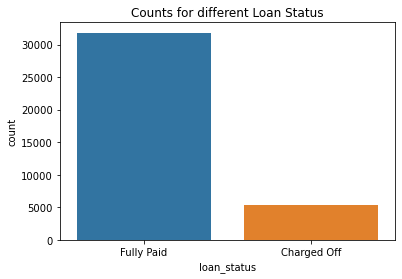

In [270]:
# Loan Status
print(loan_data.loan_status.value_counts())
sns.countplot(data=loan_data,x='loan_status')
plt.title('Counts for different Loan Status')
plt.show()

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
Mean loan amt loan_status
Charged Off    12185.797575
Fully Paid     10840.903090
Name: loan_amnt, dtype: float64
median loan amt loan_status
Charged Off    10000.0
Fully Paid      9600.0
Name: loan_amnt, dtype: float64
max loan amt loan_status
Charged Off    35000
Fully Paid     35000
Name: loan_amnt, dtype: int64
min loan amt loan_status
Charged Off    900
Fully Paid     500
Name: loan_amnt, dtype: int64


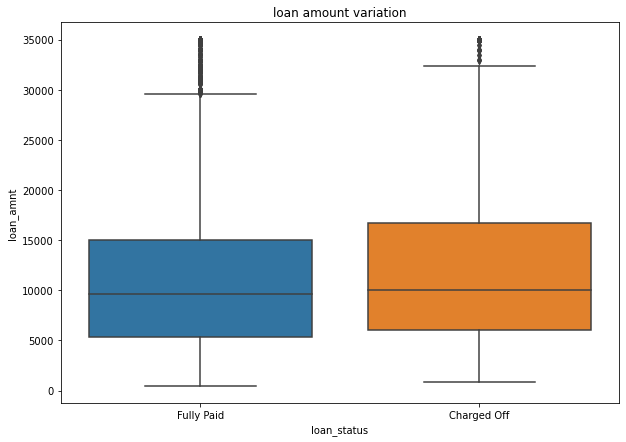

In [276]:
print(loan_data.loan_amnt.describe())
print('Mean loan amt',loan_data.groupby('loan_status')['loan_amnt'].mean())
print('median loan amt',loan_data.groupby('loan_status')['loan_amnt'].median())
print('max loan amt',loan_data.groupby('loan_status')['loan_amnt'].max())
print('min loan amt',loan_data.groupby('loan_status')['loan_amnt'].min())

plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='loan_amnt',data=loan_data)
plt.title('loan amount variation')
plt.show()

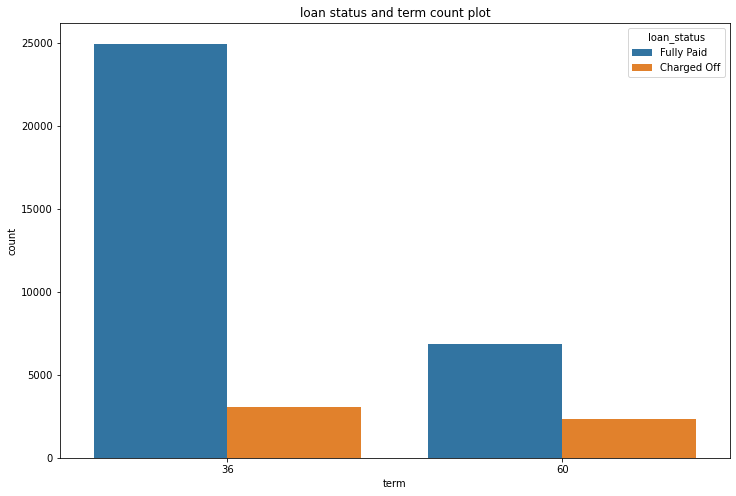

In [279]:
# Term of loan 
plt.figure(figsize=(12,8))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.title('loan status and term count plot')
plt.show()

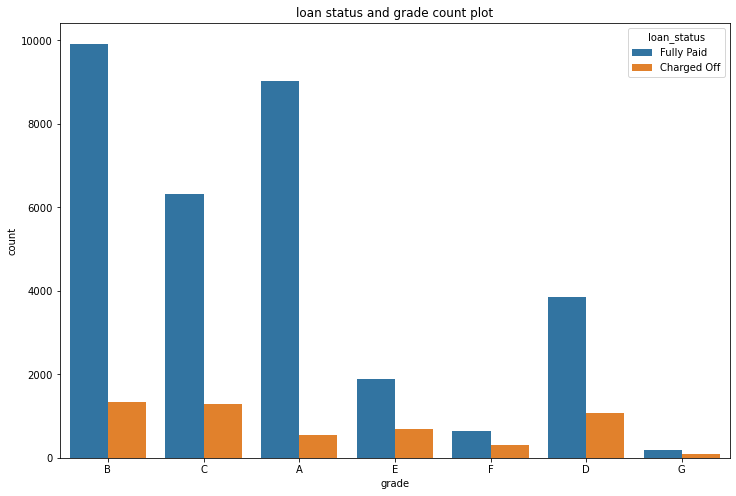

In [280]:
#grade
plt.figure(figsize=(12,8))
sns.countplot(data=loan_data,x='grade',hue='loan_status')
plt.title('loan status and grade count plot')
plt.show()

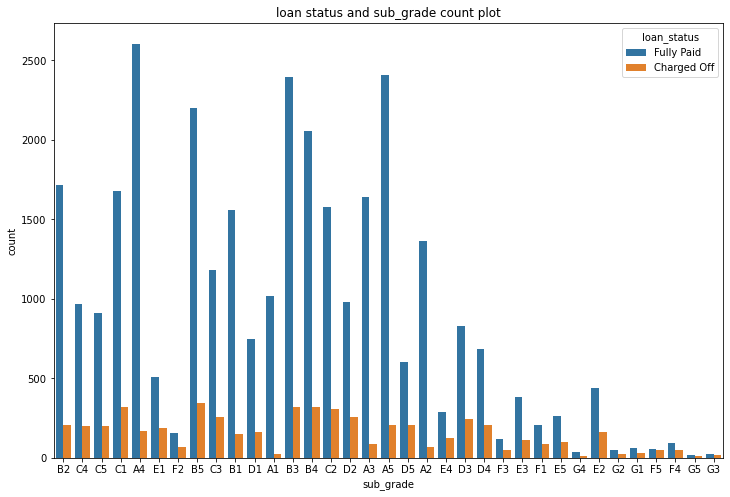

In [281]:
#sub_grade
plt.figure(figsize=(12,8))
sns.countplot(data=loan_data,x='sub_grade',hue='loan_status')
plt.title('loan status and sub_grade count plot')
plt.show()

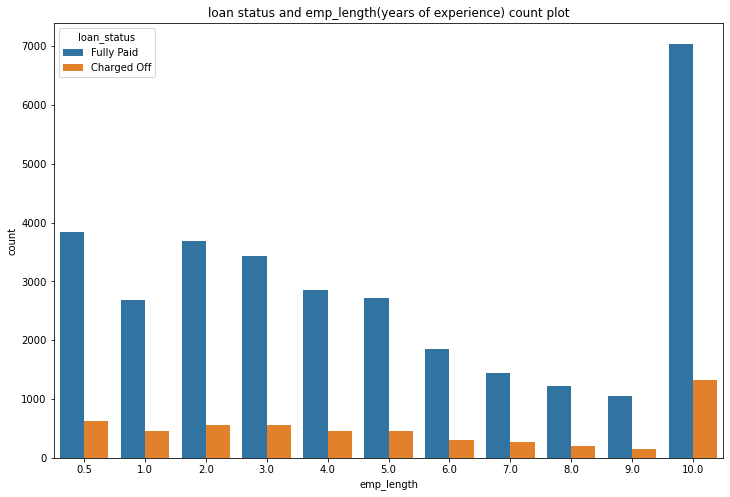

In [282]:
#emp_length
plt.figure(figsize=(12,8))
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.title('loan status and emp_length(years of experience) count plot')
plt.show()

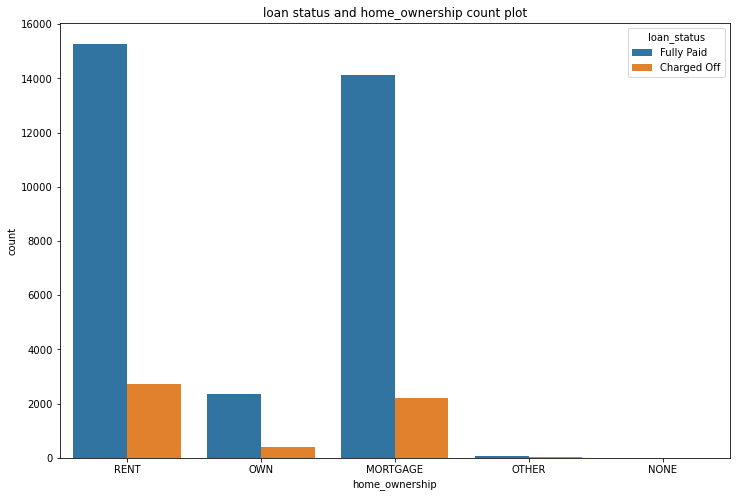

In [283]:
#home_ownership
plt.figure(figsize=(12,8))
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.title('loan status and home_ownership count plot')
plt.show()

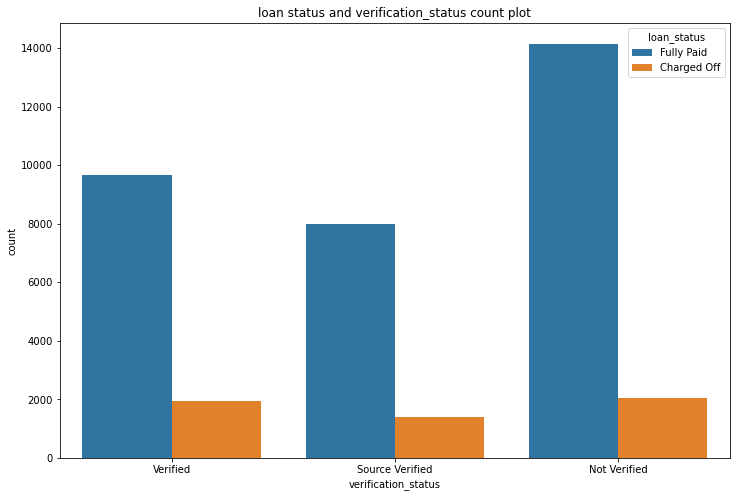

In [284]:
#verification_status
plt.figure(figsize=(12,8))
sns.countplot(data=loan_data,x='verification_status',hue='loan_status')
plt.title('loan status and verification_status count plot')
plt.show()

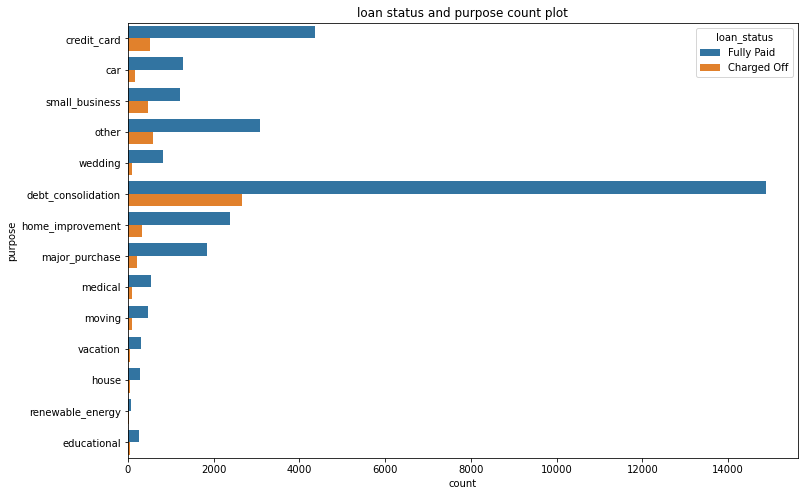

In [287]:
#purpose,addr_state
plt.figure(figsize=(12,8))
sns.countplot(data=loan_data,y='purpose',hue='loan_status')
plt.title('loan status and purpose count plot')
plt.show()

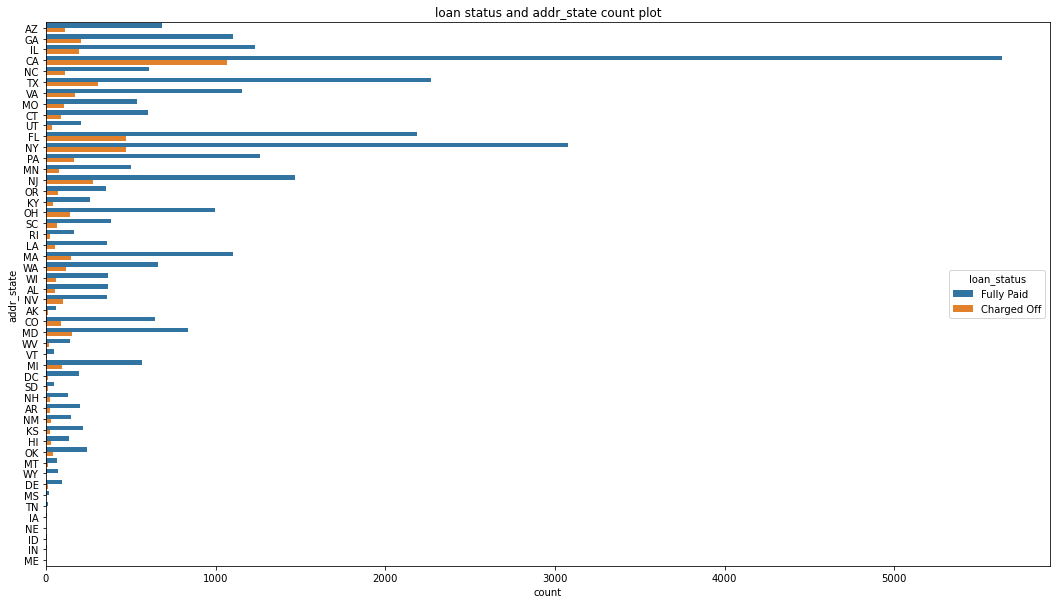

In [290]:
#addr_state
plt.figure(figsize=(18,10))
sns.countplot(data=loan_data,y='addr_state',hue='loan_status')
plt.title('loan status and addr_state count plot')
plt.show()

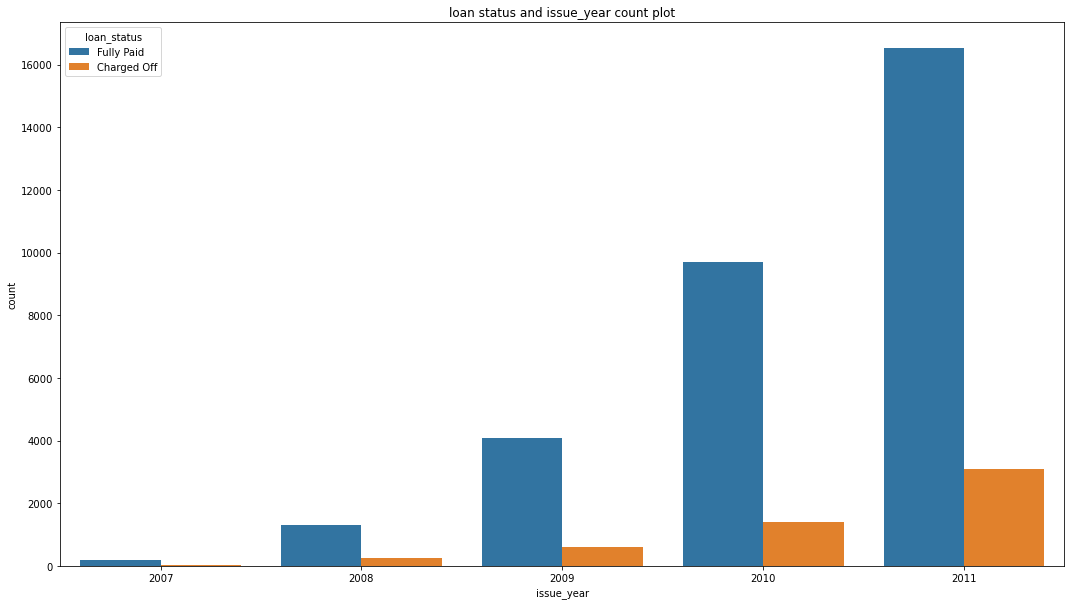

In [294]:
#issue_year
plt.figure(figsize=(18,10))
sns.countplot(data=loan_data,x='issue_year',hue='loan_status')
plt.title('loan status and issue_year count plot')
plt.show()

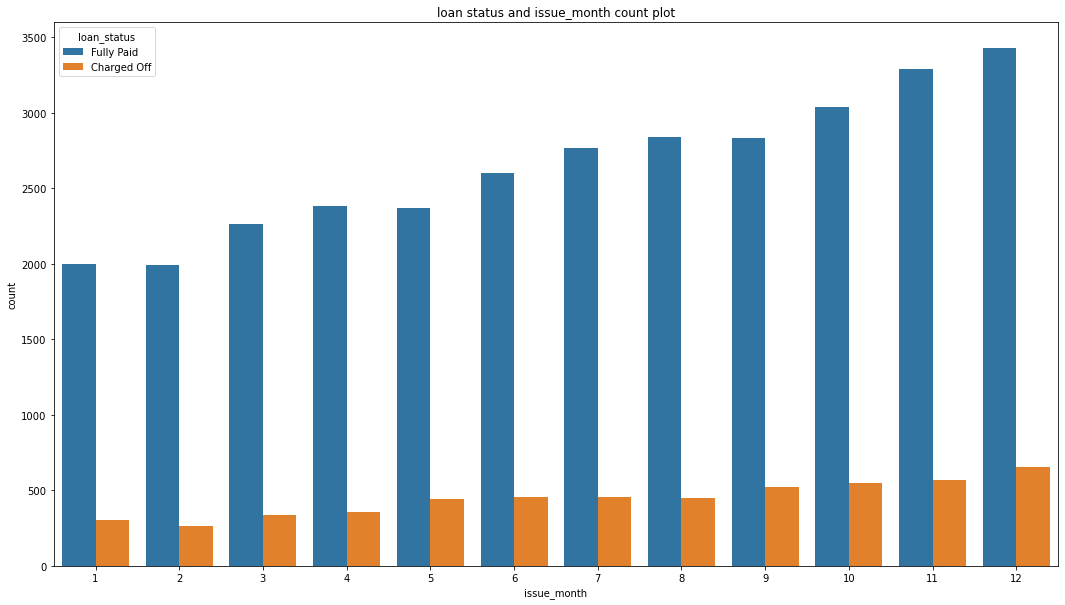

In [295]:
#issue_month
plt.figure(figsize=(18,10))
sns.countplot(data=loan_data,x='issue_month',hue='loan_status')
plt.title('loan status and issue_month count plot')
plt.show()

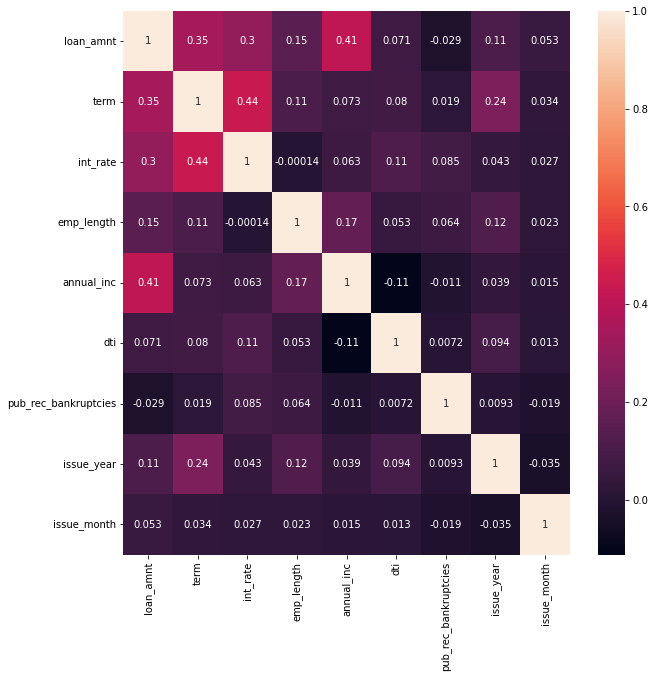

In [296]:
# Correlation using Heat Map
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()